# Testing GRCWA vs TROCWA implementations of twobox


In [1]:
import sys
# sys.path.append('../')
from Dynamics.SR_functions import Parameters, erf
from parameters import D1_ND, Parameters
from twobox import TwoBox
import numpy as np
import matplotlib.pyplot as plt

# Ilic grating

In [2]:
 ## Ilic
wavelength      = 1.5 #/ D1_ND(1.2/100)
grating_pitch   = 1.8 / wavelength
grating_depth   = 0.5 / wavelength
box1_width      = 0.15 * grating_pitch
box2_width      = 0.35 * grating_pitch
box_centre_dist = 0.60 * grating_pitch
box1_eps        = 3.5**2 
box2_eps        = 3.5**2
gaussian_width  = 2* 10   # 2.7180049942915896 * 10
substrate_depth = 0.5 / wavelength
substrate_eps   = 1.45**2

wavelength      = 1.
angle           = 0.
Nx              = 100
numG            = 25
Qabs            = np.inf

gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='GRCWA')

gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA')

### plot epsilon 

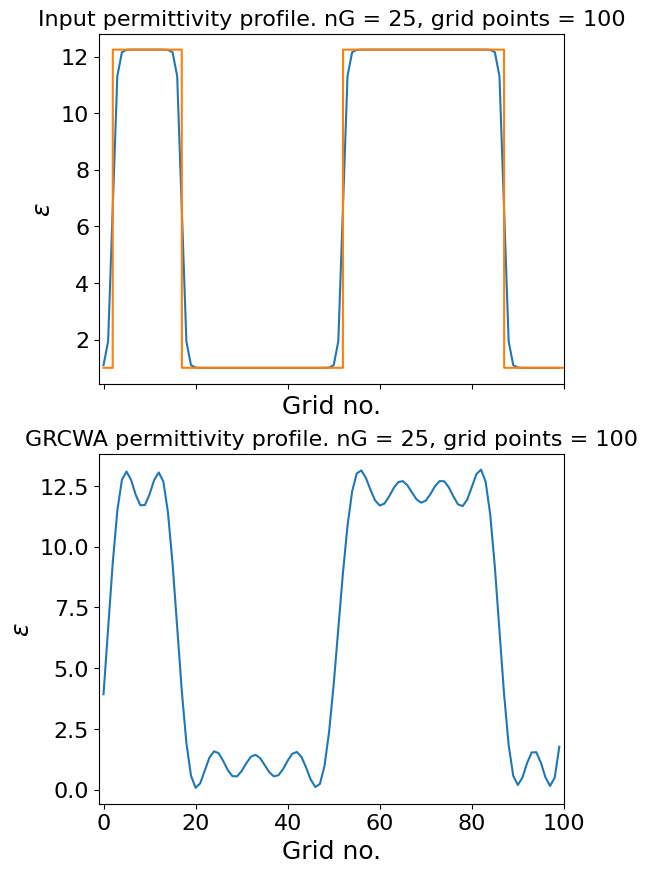

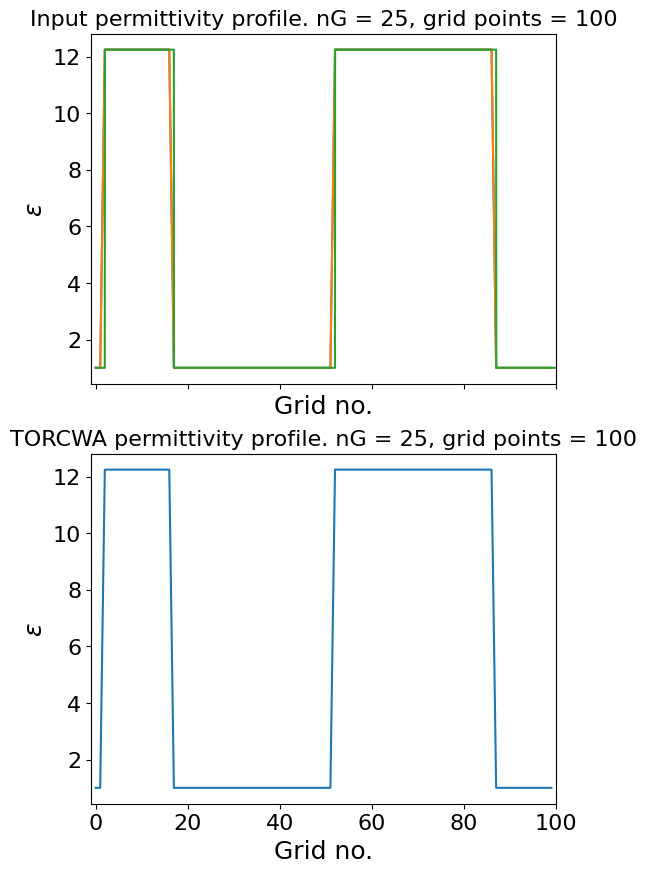

(array([0.   , 0.012, 0.024, 0.036, 0.048, 0.06 , 0.072, 0.084, 0.096,
        0.108, 0.12 , 0.132, 0.144, 0.156, 0.168, 0.18 , 0.192, 0.204,
        0.216, 0.228, 0.24 , 0.252, 0.264, 0.276, 0.288, 0.3  , 0.312,
        0.324, 0.336, 0.348, 0.36 , 0.372, 0.384, 0.396, 0.408, 0.42 ,
        0.432, 0.444, 0.456, 0.468, 0.48 , 0.492, 0.504, 0.516, 0.528,
        0.54 , 0.552, 0.564, 0.576, 0.588, 0.6  , 0.612, 0.624, 0.636,
        0.648, 0.66 , 0.672, 0.684, 0.696, 0.708, 0.72 , 0.732, 0.744,
        0.756, 0.768, 0.78 , 0.792, 0.804, 0.816, 0.828, 0.84 , 0.852,
        0.864, 0.876, 0.888, 0.9  , 0.912, 0.924, 0.936, 0.948, 0.96 ,
        0.972, 0.984, 0.996, 1.008, 1.02 , 1.032, 1.044, 1.056, 1.068,
        1.08 , 1.092, 1.104, 1.116, 1.128, 1.14 , 1.152, 1.164, 1.176,
        1.188]),
 array([[ 0.9999996 ],
        [ 0.9999996 ],
        [12.249999  ],
        [12.249999  ],
        [12.249999  ],
        [12.249999  ],
        [12.249999  ],
        [12.249999  ],
        [12.249999

In [3]:
gratingGRCWA.show_permittivity(show_analytic_box=True)
gratingTorcwa.show_permittivity(show_analytic_box=True)

Edge effect vs edge sharpness parameter in torcwa

sharpness =  1


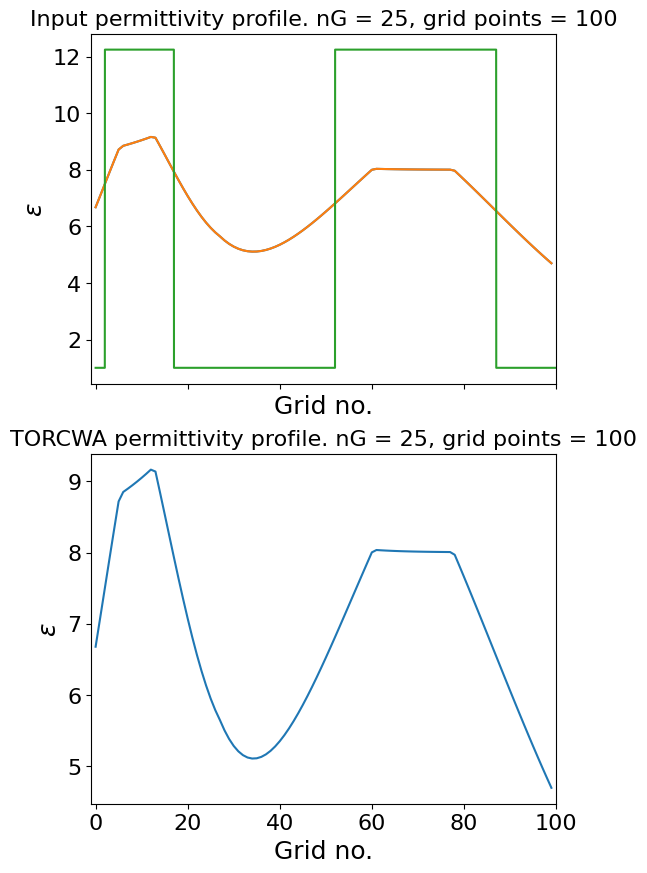

sharpness =  10


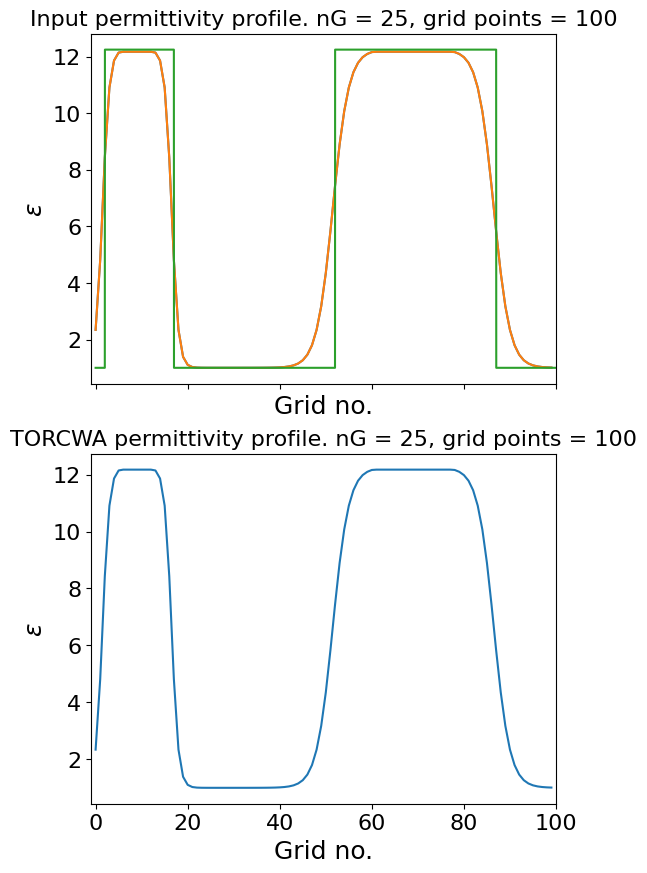

sharpness =  100


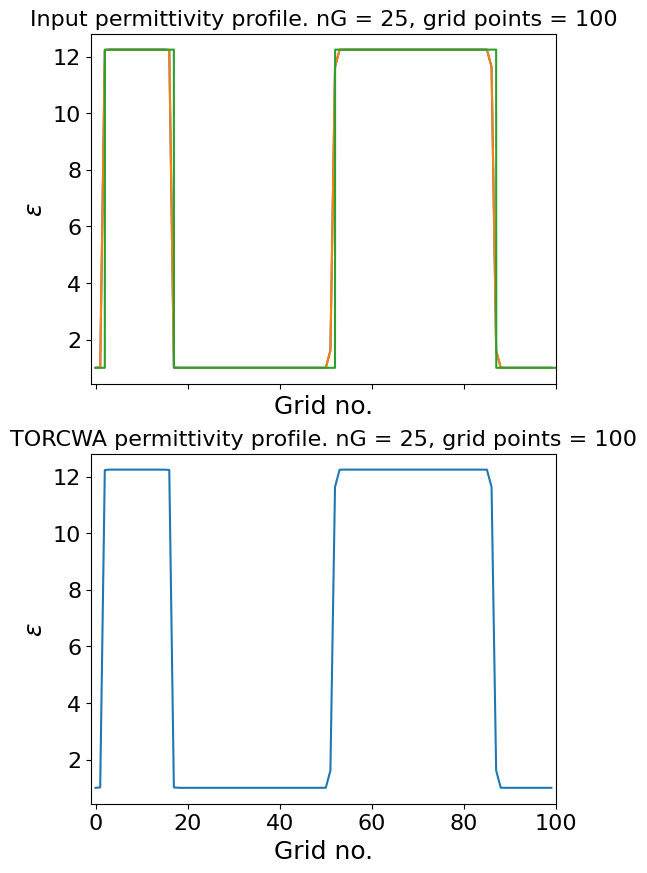

sharpness =  1000


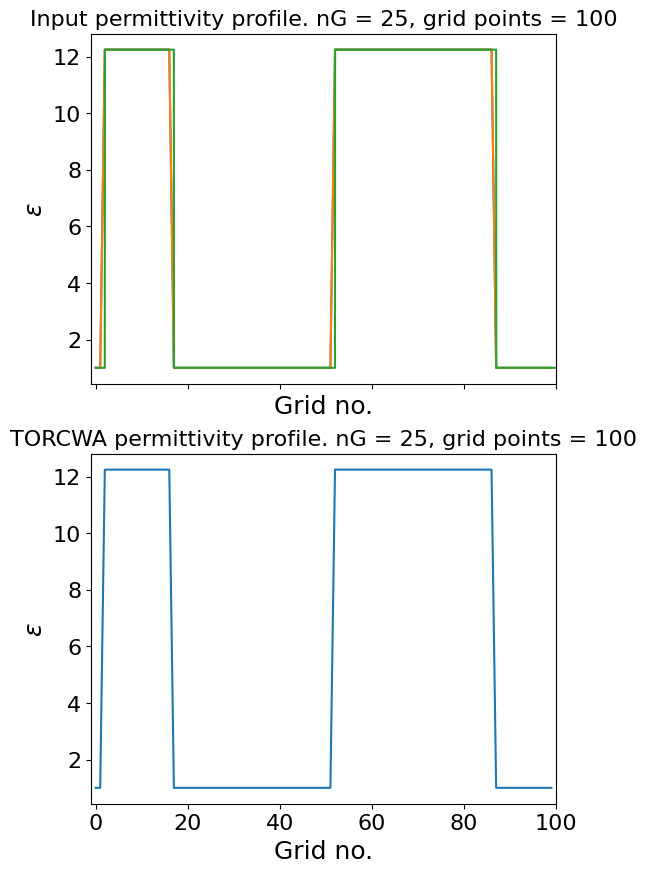

In [4]:
for sharp in np.array([1,10,100,1000]):
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=sharp)
    print('sharpness = ',sharp)
    gratingTorcwa.show_permittivity(show_analytic_box=True)

## Fourier truncation effect in Torcwa
It seems much better at avoiding Gibbs phenomena than gRCWA, even with sharpness of 1000, surprising.

order =  3


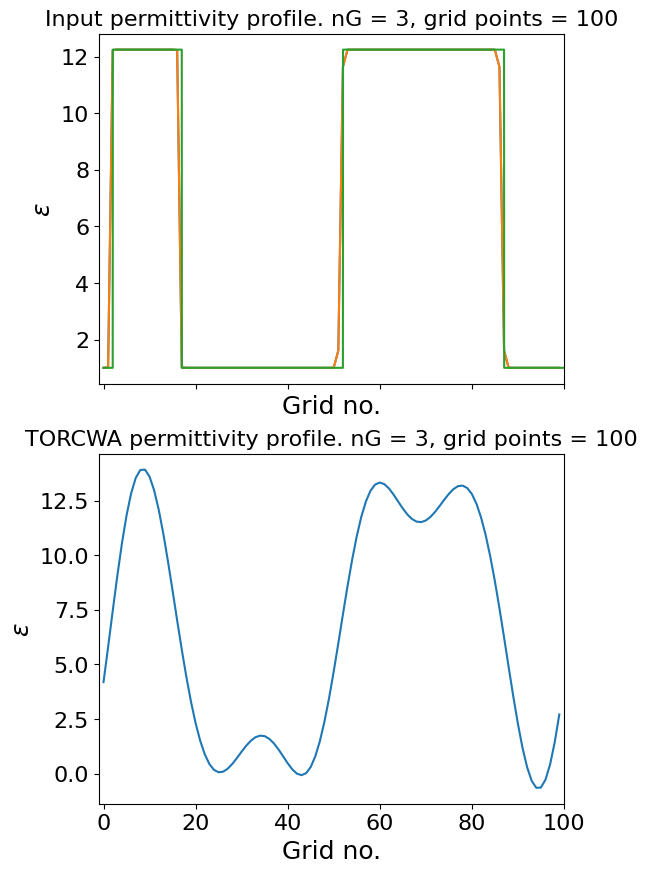

order =  10


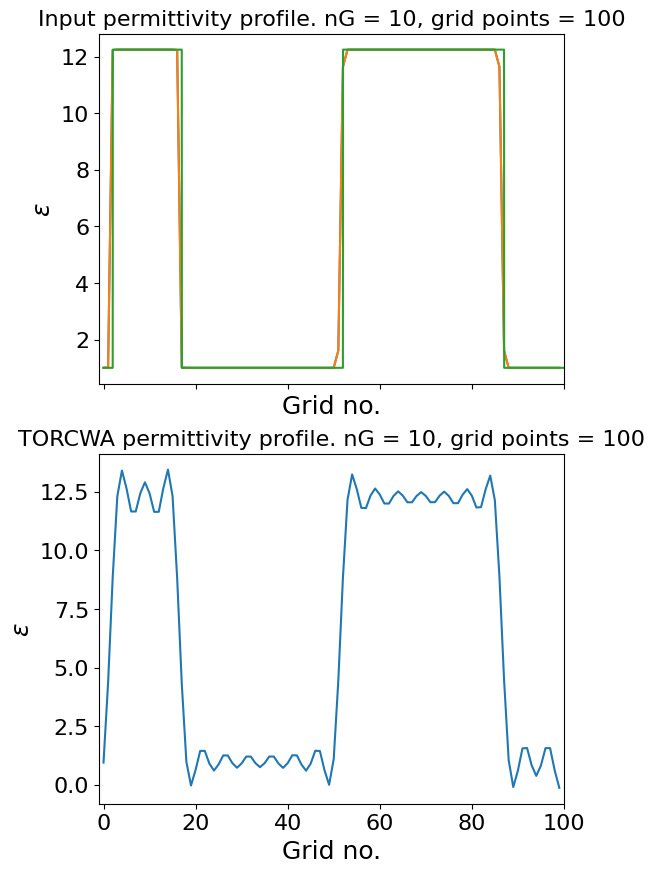

order =  25


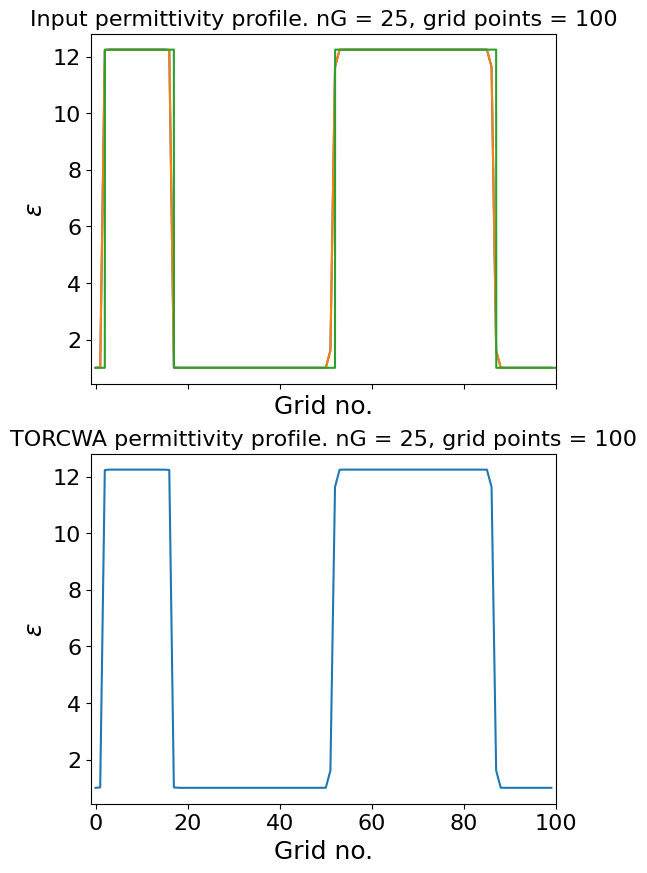

In [5]:
for order in np.array([3,10,25]):
    gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, order, Qabs, RCWA_engine='TORCWA',torcwa_edge_sharpness=100)
    print('order = ',order)
    gratingTorcwa.show_permittivity(show_analytic_box=True)

# R, T vs angle for Ilic


GRCWA time =  2.6245763301849365


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


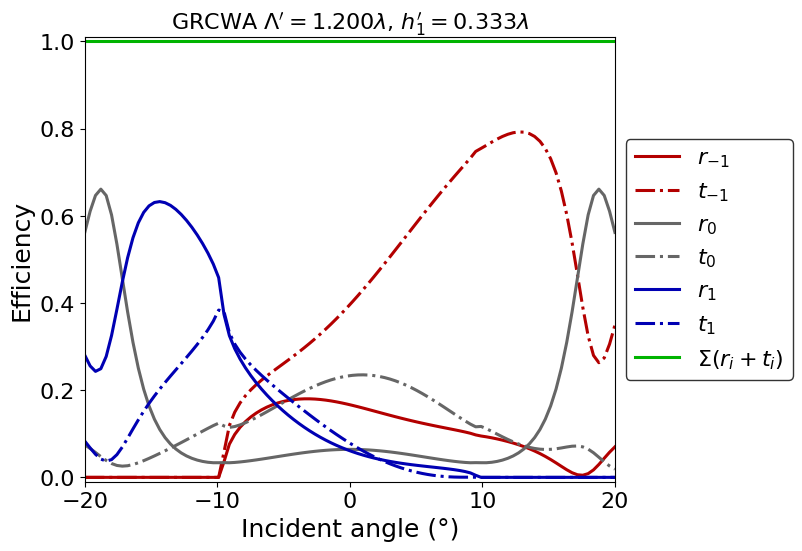

In [ ]:
numG=30
import time
start = time.time()
gratingGRCWA = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='GRCWA')
gratingGRCWA.show_angular_efficiency()
print('GRCWA time = ',time.time()-start)
start = time.time()
gratingTorcwa = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs, RCWA_engine='TORCWA')

gratingTorcwa.show_angular_efficiency()
print('TORCWA time = ',time.time()-start)